In [18]:
import torch

# 원본 텍스트
text = 'You say goodbye and I say hello.'

# 텍스트 전처리
text = text.lower()
text = text.replace('.', ' .')
print(text)

# 단어로 분리
words = text.split(' ')
print(words)

# 단어 -> 인덱스, 인덱스 -> 단어 매핑
word_to_id = {}
id_to_word = {}

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

print(word_to_id)
print(id_to_word)

# 텍스트를 인덱스로 변환 (단어 -> 고유 인덱스)
corpus = [word_to_id[w] for w in words]
corpus = torch.tensor(corpus)  # NumPy 대신 torch.Tensor로 변환
print(corpus)


you say goodbye and i say hello .
['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
tensor([0, 1, 2, 3, 4, 1, 5, 6])


In [19]:
import torch

# 텍스트 전처리 함수
def preprocess(text):
    text = text.lower()  # 소문자 변환
    text = text.replace('.', ' .')  # 마침표 앞에 공백 추가
    words = text.split(' ')  # 단어 분리

    word_to_id = {}  # 단어 -> 인덱스 매핑
    id_to_word = {}  # 인덱스 -> 단어 매핑

    # 단어 인덱스 매핑
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)  # 새로운 ID 할당
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    # 단어를 인덱스로 변환
    corpus = [word_to_id[w] for w in words]
    corpus = torch.tensor(corpus)  # NumPy 배열 대신 PyTorch 텐서로 변환

    return corpus, word_to_id, id_to_word

# 텍스트 전처리 예시
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

# 결과 출력
print("Corpus:", corpus)
print("Word to ID:", word_to_id)
print("ID to Word:", id_to_word)


Corpus: tensor([0, 1, 2, 3, 4, 1, 5, 6])
Word to ID: {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
ID to Word: {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [20]:
import torch
import numpy as np

# 주어진 C 행렬을 NumPy 배열로 정의
C = np.array([
    [0, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 1, 1, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 0, 1, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1, 0]
], dtype=np.int32)

# PyTorch 텐서로 변환
C_tensor = torch.tensor(C)

# 단어 인덱스와 관련된 word_to_id 정의 (예시)
word_to_id = {'goodbye': 1, 'hello': 0, 'say': 2}  # 예시로 간단히 생성한 딕셔너리

# 첫 번째 행 출력
print(C_tensor[0])  # 첫 번째 행

# 다섯 번째 행 출력
print(C_tensor[4])  # 다섯 번째 행

# 'goodbye' 단어에 해당하는 행 출력
goodbye_index = word_to_id['goodbye']  # 'goodbye'의 인덱스를 찾아서
print(C_tensor[goodbye_index])  # 해당 인덱스의 행 출력


tensor([0, 1, 0, 0, 0, 0, 0], dtype=torch.int32)
tensor([0, 1, 0, 1, 0, 0, 0], dtype=torch.int32)
tensor([1, 0, 1, 0, 1, 1, 0], dtype=torch.int32)


In [21]:
import torch

def create_co_matrix(corpus, vocab_size, window_size=1):
    # PyTorch 텐서를 이용한 공동 발생 행렬 초기화
    co_matrix = torch.zeros((vocab_size, vocab_size), dtype=torch.int32)

    # 코퍼스 순회
    for idx, word_id in enumerate(corpus):
        # 윈도우 크기만큼 양옆의 단어들 체크
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1  # 왼쪽 단어와의 공동 발생 횟수 증가

            if right_idx < len(corpus):
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1  # 오른쪽 단어와의 공동 발생 횟수 증가

    return co_matrix


In [22]:
def cos_similarity(x, y, eps=1e-8):
    # 텐서 연산을 사용하여 코사인 유사도 계산
    nx = x / (torch.sqrt(torch.sum(x**2)) + eps)
    ny = y / (torch.sqrt(torch.sum(y**2)) + eps)
    return torch.dot(nx, ny)

# 텍스트 전처리 함수 (PyTorch 텐서 사용)
def preprocess(text):
    text = text.lower()  # 소문자 변환
    text = text.replace('.', ' .')  # 마침표 앞에 공백 추가
    words = text.split(' ')  # 단어 분리

    word_to_id = {}  # 단어 -> 인덱스 매핑
    id_to_word = {}  # 인덱스 -> 단어 매핑

    # 단어 인덱스 매핑
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)  # 새로운 ID 할당
            word_to_id[word] = new_id
            id_to_word[new_id] = word

    # 단어를 인덱스로 변환
    corpus = [word_to_id[w] for w in words]
    corpus = torch.tensor(corpus)  # NumPy 배열 대신 PyTorch 텐서로 변환

    return corpus, word_to_id, id_to_word

# 공동 발생 행렬 생성 함수 (NumPy -> PyTorch로 변환)
def create_co_matrix(corpus, vocab_size, window_size=1):
    co_matrix = torch.zeros((vocab_size, vocab_size), dtype=torch.int32)  # PyTorch 텐서로 초기화

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size + 1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1

            if right_idx < len(corpus):
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix

# 텍스트 예시
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
co_matrix = create_co_matrix(corpus, vocab_size, window_size=1)

# 'you'와 'i'의 공동 발생 행렬 벡터
c0 = co_matrix[word_to_id['goodbye']]
c1 = co_matrix[word_to_id['hello']]

# 코사인 유사도 계산
print(cos_similarity(c0, c1))


tensor(0.5000)


In [25]:
# 가장 유사한 단어를 찾는 함수
def most_similar(query, word_to_id, id_to_word, co_matrix, top=5):
    if query not in word_to_id:
        print(f'{query} is not found')
        return

    print(f'[query] {query}')
    query_id = word_to_id[query]
    query_vec = co_matrix[query_id]

    vocab_size = len(id_to_word)
    similarity = torch.zeros(vocab_size)  # NumPy 대신 PyTorch 텐서 사용

    # 각 단어와의 코사인 유사도 계산
    for i in range(vocab_size):
        similarity[i] = cos_similarity(co_matrix[i], query_vec)

    count = 0
    # 코사인 유사도를 내림차순으로 정렬하여 가장 유사한 단어 출력
    for i in (-similarity).argsort():  # 유사도를 내림차순으로 정렬
        if id_to_word[i.item()] == query:  # 텐서를 정수형으로 변환하여 사용
            continue
        print(f' {id_to_word[i.item()]}: {similarity[i].item()}')  # 텐서를 출력할 때는 `.item()`으로 값 추출
        count += 1
        if count >= top:
            return


In [27]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

most_similar('you', word_to_id, id_to_word, C, top=5)

most_similar('i', word_to_id, id_to_word, C, top=5)

[query] you
 goodbye: 0.7071067690849304
 i: 0.7071067690849304
 hello: 0.7071067690849304
 say: 0.0
 and: 0.0
[query] i
 goodbye: 0.9999999403953552
 you: 0.7071067690849304
 hello: 0.4999999701976776
 say: 0.0
 and: 0.0


In [28]:
def ppmi(C, verbose=False, eps=1e-8):
    M = torch.zeros_like(C, dtype=torch.float32)  # PyTorch 텐서로 초기화
    N = torch.sum(C)  # 텐서의 총합
    S = torch.sum(C, axis=0)  # 각 단어의 빈도 (열의 합)
    total = C.shape[0] * C.shape[1]
    cnt = 0

    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            # PPMI 계산
            pmi = torch.log2((C[i, j] * N) / (S[j] * S[i]) + eps)
            M[i, j] = torch.max(torch.tensor(0.0), pmi)  # PPMI는 음수가 될 수 없으므로 0과 비교

        if verbose:
            cnt += C.shape[1]
            if cnt % (total // 100 + 1) == 0:
                print('%.1f%% 완료' % (100 * cnt / total))

    return M


In [29]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

# PPMI 계산
W = ppmi(C)

# 출력
np.set_printoptions(precision=3)
print("동시발생 행렬")
print(C)
print("-"*50)
print("PPMI 행렬")
print(W)

동시발생 행렬
tensor([[0, 1, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 1, 0],
        [0, 1, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0]], dtype=torch.int32)
--------------------------------------------------
PPMI 행렬
tensor([[0.0000, 1.8074, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [1.8074, 0.0000, 0.8074, 0.0000, 0.8074, 0.8074, 0.0000],
        [0.0000, 0.8074, 0.0000, 1.8074, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.8074, 0.0000, 1.8074, 0.0000, 0.0000],
        [0.0000, 0.8074, 0.0000, 1.8074, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8074, 0.0000, 0.0000, 0.0000, 0.0000, 2.8074],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 2.8074, 0.0000]])


In [30]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

# PPMI 계산
W = ppmi(C)

# SVD 계산 (PyTorch 텐서에서 SVD 계산)
U, S, V = torch.svd(W)

# 출력
np.set_printoptions(precision=3)

# 첫 번째 행 출력
print("동시발생 행렬")
print(C.numpy())  # 텐서를 NumPy 배열로 변환하여 출력
print("-"*50)
print("PPMI 행렬")
print(W.numpy())  # 텐서를 NumPy 배열로 변환하여 출력
print("-"*50)
print("SVD U 행렬")
print(U.numpy())  # 텐서를 NumPy 배열로 변환하여 출력


동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI 행렬
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]
--------------------------------------------------
SVD U 행렬
[[-3.409e-01  0.000e+00  1.205e-01 -1.192e-07 -9.323e-01  0.000e+00
   6.209e-08]
 [ 0.000e+00 -5.976e-01  0.000e+00  1.802e-01  0.000e+00 -7.812e-01
   0.000e+00]
 [-4.363e-01 -2.277e-08  5.088e-01 -1.166e-07  2.253e-01 -9.488e-09
  -7.071e-01]
 [-9.898e-08 -4.978e-01  1.765e-08  6.804e-01 -5.571e-08  5.378e-01
  -1.450e-08]
 [-4.363e-01 -1.240e-08  5.088e-01 -6.351e-08  2.253e-01 -5.167e-09
   7.071e-01]
 [-7.092e-01 -1.240e-08 -6.

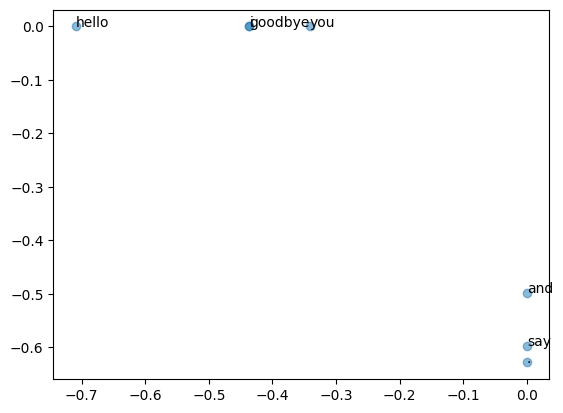

In [33]:
import matplotlib.pyplot as plt

for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id, 0].item(), U[word_id, 1].item()))  # 텐서에서 값을 추출하여 시각화

# 시각화: 단어 벡터들
plt.scatter(U[:, 0].numpy(), U[:, 1].numpy(), alpha=0.5)  # 텐서를 NumPy 배열로 변환
plt.show()

In [36]:
import sys, os
import torch
import numpy as np
from torch import nn
import torch.optim as optim
from dataset import ptb
from common.util import preprocess, create_co_matrix, ppmi

sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'deeplearning'))

# 말뭉치 로드
corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기: ', len(corpus))
print('corpus[:30] : ', corpus[:30])
print()
print('id_to_word[0] : ', id_to_word[0])
print('id_to_word[1] : ', id_to_word[1])
print('id_to_word[2] : ', id_to_word[2])
print()
print("word_to_id['car'] : ", word_to_id['car'])
print("word_to_id['happy'] : ", word_to_id['happy'])
print("word_to_id['lexus'] : ", word_to_id['lexus'])

# 하이퍼파라미터 설정
window_size = 2
wordvec_size = 100

# 데이터 로드
corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)

# 동시발생 수 계산
print("동시발생 수 계산 ...")
C = create_co_matrix(corpus, vocab_size, window_size)

# PPMI 계산
print("PPMI 계산 ...")
W = ppmi(C, verbose=True)

# SVD 계산
print("SVD 계산 ...")
try:
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5, random_state=None)
except ImportError:
    U, S, V = np.linalg.svd(W)

word_vecs = U[:, :wordvec_size]  # 단어 벡터

# PyTorch에서 사용할 텐서로 변환
word_vecs_tensor = torch.tensor(word_vecs, dtype=torch.float32)

# 코사인 유사도 계산 함수 (PyTorch 버전)
def cos_similarity(x, y, eps=1e-8):
    x = x / (torch.sqrt(torch.sum(x**2)) + eps)
    y = y / (torch.sqrt(torch.sum(y**2)) + eps)
    return torch.dot(x, y)

# most_similar 함수 (PyTorch 버전)
def most_similar(query, word_to_id, id_to_word, word_vecs_tensor, top=5):
    if query not in word_to_id:
        print(f'{query} is not found')
        return

    print(f'[query] {query}')
    query_id = word_to_id[query]
    query_vec = word_vecs_tensor[query_id]

    # 유사도 계산
    similarity = torch.zeros(len(id_to_word))  # 유사도를 저장할 텐서
    for i in range(len(id_to_word)):
        similarity[i] = cos_similarity(query_vec, word_vecs_tensor[i])

    # 유사도 내림차순으로 정렬
    _, most_similar_ids = torch.topk(similarity, top, largest=True)

    # 가장 유사한 단어 출력
    for i in most_similar_ids:
        print(f'{id_to_word[i.item()]}: {similarity[i.item()].item()}')

# 예시 단어들에 대해 가장 유사한 단어 출력
querys = ['you', 'year', 'car', 'toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs_tensor, top=5)


말뭉치 크기:  929589
corpus[:30] :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0] :  aer
id_to_word[1] :  banknote
id_to_word[2] :  berlitz

word_to_id['car'] :  3856
word_to_id['happy'] :  4428
word_to_id['lexus'] :  7426
동시발생 수 계산 ...
PPMI 계산 ...
1.00 완료
2.00 완료
3.00 완료
4.00 완료
5.00 완료
6.00 완료
7.00 완료
8.00 완료
9.00 완료
10.00 완료
11.00 완료
12.00 완료
13.00 완료
14.00 완료
15.00 완료
16.00 완료
17.00 완료
18.00 완료
19.00 완료
20.00 완료
21.00 완료
22.00 완료
23.00 완료
24.00 완료
25.00 완료
26.00 완료
27.00 완료
28.00 완료
29.00 완료
30.00 완료
31.00 완료
32.00 완료
33.00 완료
34.00 완료
35.00 완료
36.00 완료
37.00 완료
38.00 완료
39.00 완료
40.00 완료
41.00 완료
42.00 완료
43.00 완료
44.00 완료
45.00 완료
46.00 완료
47.00 완료
48.00 완료
49.00 완료
50.00 완료
51.00 완료
52.00 완료
53.00 완료
54.00 완료
55.00 완료
56.00 완료
57.00 완료
58.00 완료
59.00 완료
60.00 완료
61.00 완료
62.00 완료
63.00 완료
64.00 완료
65.00 완료
66.00 완료
67.00 완료
68.00 완료
69.00 완료
70.00 완료
71.00 완료
72.00 완료
73.00 완료
74.00 완료
75.00 완료
76.00 완료
77.00 완료
78.00 완료
7